In [3]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as tm
import time
import os
import datetime
import string
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pandas as pd
import numpy as np
import requests

#  Data Gathering: getting the data from Twitter


> 1. The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link:

In [2]:
# Import file with twitter posts as a pandas dataframe
archive_tw = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
archive_tw.shape

(2356, 17)

>2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [5]:

# Programatically download the datafile with breed predictions based on the tweet's image from a URL to insure reproducibility
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open ('image-predictions.tsv', mode = 'wb') as file: 
    file.write(r.content)


In [6]:
predic = pd.read_csv('image-predictions.tsv', sep='\t')

In [7]:
predic.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [8]:
predic.shape

(2075, 12)

> 3. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [13]:
import tweepy 

api_key = 'HIDDEN'
api_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify=True)

In [14]:
# get tweet status
tweets = api.get_status(archive.tweet_id[7], tweet_mode='extended')

In [15]:
# show tweet info
info = tweets._json
info

{'created_at': 'Fri Jul 28 00:22:40 +0000 2017',
 'id': 890729181411237888,
 'id_str': '890729181411237888',
 'full_text': "When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq",
 'truncated': False,
 'display_text_range': [0, 118],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 890729118844600320,
    'id_str': '890729118844600320',
    'indices': [119, 142],
    'media_url': 'http://pbs.twimg.com/media/DFyBag_UQAAhhBC.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DFyBag_UQAAhhBC.jpg',
    'url': 'https://t.co/v0nONBcwxq',
    'display_url': 'pic.twitter.com/v0nONBcwxq',
    'expanded_url': 'https://twitter.com/dog_rates/status/890729181411237888/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'large': {'w': 1200, 'h': 1328, 'resize': 'fit'},
     'medium': {'w': 1084, 'h': 1200,

In [16]:
#create tweet_json.txt file with to store each tweet's entire set of JSON data
jason_file = 'tweet_json.txt'
if not os.path.isfile(jason_file):
    open(jason_file, 'w', encoding = 'UTF-8')

In [17]:
# create a tweet id list
tweet_ids = archive.tweet_id.values

In [18]:
print(tweet_ids)

[892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149]


In [19]:
# Dataframe with the tweet ids in twitter_archive-enhanced.csv
#df_tweets = archive.tweet_id.

In [20]:
errors_tweets = []

# get start time of query
print("Start time:", datetime.datetime.now().time())
start = time.time()

# write JSON to .txt file
with open('tweet_json.txt', 'w', encoding = 'UTF-8') as file:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            #getting the tweets into tweet._json
            json.dump(tweet._json, file)
            #write to an existing file
            file.write('\n')
        except Exception as e:
            print("Error:", tweet_id, "Time:",  datetime.datetime.now().time())
            errors_tweets.append(tweet_id)

            # get end time of query
end = time.time()
print("End time:", datetime.datetime.now().time())

# display runtime
print("Runtime: ", end - start)

Start time: 20:24:15.613860
Error: 888202515573088257 Time: 20:24:19.677340
Error: 873697596434513921 Time: 20:24:34.547904
Error: 872668790621863937 Time: 20:24:35.718011
Error: 872261713294495745 Time: 20:24:36.288745
Error: 869988702071779329 Time: 20:24:39.012469
Error: 866816280283807744 Time: 20:24:41.758413
Error: 861769973181624320 Time: 20:24:46.175760
Error: 856602993587888130 Time: 20:24:51.213475
Error: 851953902622658560 Time: 20:24:56.449028
Error: 845459076796616705 Time: 20:25:03.483571
Error: 844704788403113984 Time: 20:25:04.549421
Error: 842892208864923648 Time: 20:25:05.899210
Error: 837366284874571778 Time: 20:25:12.968350
Error: 837012587749474308 Time: 20:25:13.326848
Error: 829374341691346946 Time: 20:25:25.935308
Error: 827228250799742977 Time: 20:25:29.429829
Error: 812747805718642688 Time: 20:25:53.115065
Error: 802247111496568832 Time: 20:26:04.648012
Error: 779123168116150273 Time: 20:26:39.800082
Error: 775096608509886464 Time: 20:26:46.243890
Error: 77100

In [21]:
errors_tweets

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 851953902622658560,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 779123168116150273,
 775096608509886464,
 771004394259247104,
 770743923962707968,
 759566828574212096,
 754011816964026368,
 680055455951884288]

In [9]:
# extract data from tweet_json.txt file
# tweet
df_tw = []
with open('tweet_json.txt') as json_file:
    # data = json.loads(json_file)
    for line in json_file:
        data = json.loads(line)
        df_tw.append({'tweet_id': data['id'],
                        'retweet_count': data['retweet_count'],
                        'favorite_count': data['favorite_count']})

In [10]:
# create dataframe
df_tweet_api = pd.DataFrame(df_tw, columns= ['tweet_id',
                                           'retweet_count',
                                           'favorite_count'])

In [11]:
df_tweet_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7370,35047
1,892177421306343426,5493,30346
2,891815181378084864,3631,22811
3,891689557279858688,7548,38318
4,891327558926688256,8136,36588


In [12]:
# save dataframe
df_tweet_api.to_csv('df_tweets.csv', index=False)

#  Visual Assessment: getting acquainted with the data
> **Twitter_Archive_Enhanced** table
> - Missing values on columns: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, 
> - No values on dog stages columns: `doggo`, `floofer`, `pupper`, `puppo`
    
> **Image_predictions** table
> - Predictions with small confidence percentages

> **df_tweets** table
> - df_tweets with Twitter_Archive_Enhanced can be merged by `tweet_id` column
> - **Quality**: Unnamed Columns, `Unnamed Columns`

In [13]:
#reading data
df = pd.read_csv('df_tweets.csv')

In [14]:
## change settings in order to see everything
pd.set_option('display.max_colwidth', -1)

In [15]:
archive_tw.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1909,674422304705744896,NaN,NaN,2015-12-09 02:56:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ava. She doesn't understand flowers. 12/10 would caress firmly https://t.co/BxTJAFSIgk,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674422304705744896/photo/1,12,10,Ava,None,None,None,None
1570,687732144991551489,NaN,NaN,2016-01-14 20:24:55 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Ember. That's the q-tip she owes money to. 11/10 pay up pup. (vid by @leanda_h) https://t.co/kGRcRjRJRl,NaN,NaN,NaN,https://vine.co/v/iOuMphL5DBY,11,10,Ember,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None


In [16]:
predic.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
377,673213039743795200,https://pbs.twimg.com/media/CVe7r7QVEAAc4Bg.jpg,1,schipperke,0.888082,True,groenendael,0.047727,True,kelpie,0.041398,True
1932,859196978902773760,https://pbs.twimg.com/ext_tw_video_thumb/859196962498805762/pu/img/-yBpr4-o4GJZECYE.jpg,1,Angora,0.224218,False,malamute,0.216163,True,Persian_cat,0.128383,False


In [17]:
df.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7370,35047
1,892177421306343426,5493,30346


In [18]:
df.sample(2)

,tweet_id,retweet_count,favorite_count
1252,709158332880297985,393,1957
972,748337862848962560,3947,7367


#  Programatic Assessment: 
## Quality 
> **Twitter Enhanced** table
> - Missing values on columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `expanded_urls` 
> - Predictions with not enough confidence percentage
> - Different datatypes on `text` columns: text adn urls
> - Erroneous datatyopes: Timestamp column not in `datetime` datatype
> - 'None' values in place of missing value tag: NaN ✓
> - No values on columns: doggo, floofer, pupper, puppo 
> - Predicted breeds names with lower and upper case  
> - 'A' being the most common name soundsweird, looks like a mistake
> **Image Predictions** table
> - Three different predictions with different highest confidence percentage
> - Tables could be just in one big DataFrame: merge df_tweets with archive, by `tweet_id
> **df_tweets** table
> - Unnamed Column: `Unnamed Column`, generated while saving your dataframe to csv. fix by `pd. to_csv(filename, index=False)` (see cell 32)
> - Tables could be just in one big DataFrame: merge df_tweets with archive, by `tweet_id`
    
## Tidiness 

> - Doggo, floofer, pupper, puppo column exist in different columns: should  be combined into a single column as this is one variable that identify stage of dog
> - Information about tweets is spread across three different files/dataframes. These three dataframes should be merged as they are the same observational unit


In [19]:
#check datatypes and missing values
#no missing data found
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [20]:
df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [21]:
archive_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [22]:
archive_tw.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [23]:
archive_tw.in_reply_to_status_id.nunique()

77

In [24]:
predic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
predic.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [26]:
##check for duplicates
sum(df.duplicated())
#no duplicates found

0

#  Cleaning Process: 

## Quality 
> **Define**
> - Remove all rows that have values (not blank or non-null) in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns.**✓** 
> - Remove retweets columns: `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`**✓**
> - Remove useless columns: `in_reply_to_status_id`, `in_reply_to_user_id`**✓** 
> - Change the value 'None' with the missing value tag NaN **✓**   
> - Change datatypes to datetime on `timestamp` column **✓**
> - Change dog name 'A' for Nan **✓**
> - Clean all non-dog names in name column such as 'a', 'such', 'the', 'just', 'getting' etc.
> - Split text and url; create an `url column`**✓**
> - Pick just the prediction with the highest confidence percentage **✓**
> - The ratings hasn´t been standarized, due to the different denominators. **✓**

## Tidiness
> **Define**
> - Combine doggo, floofer, pupper, puppo into a single column as this is one variable that identify stage of dog
> - Merge tweets information as they are the same observational unit. Merge df_tweets with Twitter_Archive_Enhanced by the `tweet_id` column. Merge Image Predictions with Twitter_Archive_Enhanced by the `tweet_id` column **✓** 


> **Define**/**Code**
> - Create copies of three dataframes

In [27]:
##creating copies
df_clean = df.copy()
archive_tw_clean = archive_tw.copy()
predic_clean = predic.copy()

> **Test**

In [28]:
df_clean.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7370,35047
1,892177421306343426,5493,30346


> **Define**
> - Remove all rows that have values (not blank or non-null) in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns.

> **Code**

In [29]:
archive_tw_clean = archive_tw_clean[archive_tw_clean.retweeted_status_id.isnull()]

In [30]:
archive_tw_clean = archive_tw_clean[archive_tw_clean.retweeted_status_user_id.isnull()]

In [31]:
archive_tw_clean = archive_tw_clean[archive_tw_clean.retweeted_status_timestamp.isnull()]

>**Test**

In [32]:
archive_tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

> **Define**
> - Remove retweets columns `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`

>**Code**

In [33]:
#Remove the following columns:
archive_tw_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

>**Test**    

In [34]:
archive_tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


> **Define**
> - Remove useless columns: `in_reply_to_status_id`, `in_reply_to_user_id`

> **Code**

In [35]:
archive_tw_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

> **Test**


In [36]:
archive_tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


> **Define**
> - Add values on dog stages columns: doggo, floofer, pupper, puppo: replace None by Nan

> **Code**

In [37]:
#replace the value 'None' with NaN (missing value)
archive_tw_clean =  archive_tw_clean.replace('None', np.nan)

> **Test**

In [38]:
archive_tw_clean.doggo.head(10)

0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  
5    NaN  
6    NaN  
7    NaN  
8    NaN  
9    doggo
Name: doggo, dtype: object

> **Define**
> - Replace all Nan values with np.nan

> **Code**

In [39]:
archive_tw_clean =  archive_tw_clean.replace('None', np.nan)

> **Test**

In [40]:
archive_tw_clean.name.value_counts()

a             55
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Tucker        9 
Penny         9 
Sadie         8 
Lola          8 
Winston       8 
the           8 
Toby          7 
Daisy         7 
Bo            6 
Stanley       6 
Bailey        6 
Koda          6 
Jax           6 
an            6 
Oscar         6 
Bella         6 
Scout         5 
Dave          5 
Rusty         5 
Buddy         5 
Chester       5 
Milo          5 
Bentley       5 
Louis         5 
Leo           5 
             .. 
JD            1 
Mary          1 
Farfle        1 
Bookstore     1 
Koko          1 
Samsom        1 
Nugget        1 
Boots         1 
Lizzie        1 
Carter        1 
Cal           1 
Cilantro      1 
Ralf          1 
Adele         1 
Poppy         1 
Staniel       1 
Mark          1 
Hazel         1 
Brian         1 
Alf           1 
Jed           1 
Dug           1 
Mauve         1 
Luther        1 
Kane          1 
Bronte        1 
Creg          1 
Longfellow    

> **Define**
> - Change datatypes to datetime on timestamp and retweeted_status columns

> **Code**

In [41]:
archive_tw_clean['timestamp'] = pd.to_datetime(archive_tw_clean['timestamp'])

> **Test**

In [42]:
archive_tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1495 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.9+ KB


> **Define**
> - Split text and url; create an `url column`

> **Code**

In [43]:
#get the length of text+url in column text
url = 'https://t.co/AtUZn91f7f'
url_len = len(url)+1
url_len

24

In [44]:
#create a new column with the url from text
archive_tw_clean['url_from_text'] = archive_tw_clean['text'].apply(lambda row: row[-url_len:])

>**Test**

In [45]:
archive_tw_clean.url_from_text.sample()

1187     https://t.co/JyNmyjy3fe
Name: url_from_text, dtype: object

>**Define** (tidiness issue #2)
> - Merge df_tweets with Twitter_Archive_Enhanced by the `tweet_id` column 

> **Code**

In [46]:
df_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7370,35047
1,892177421306343426,5493,30346
2,891815181378084864,3631,22811
3,891689557279858688,7548,38318
4,891327558926688256,8136,36588


In [47]:
archive_tw_clean = pd.merge(left=archive_tw_clean, right=df_clean, how='left', on='tweet_id')

>**Test**

In [48]:
archive_tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 15 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1495 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
url_from_text         2175 non-null object
retweet_count         2168 non-null float64
favorite_count        2168 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 271.9+ KB


>**Define**
> - Pick just the prediction with the highest confidence percentage fro predic table 

> **Code**

In [49]:
predic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [50]:
predic_clean.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace =True)

>**Test**

In [51]:
predic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 83.2+ KB


>**Define**
> - Merge Image Predictions with Twitter_Archive_Enhanced by the `tweet_id` column 

> **Code**

In [52]:
# merge archive_tw_clean with predic_clean
archive_tw_clean = pd.merge(left=archive_tw_clean, right=predic_clean, how='left', on='tweet_id')

> **Test**

In [53]:
archive_tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 20 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1495 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
url_from_text         2175 non-null object
retweet_count         2168 non-null float64
favorite_count        2168 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
dtypes: datetime64[ns](1), floa

In [54]:
archive_tw_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,url_from_text,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN,https://t.co/MgUWQ76dJU,7370.0,35047.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN,https://t.co/0Xxu71qeIV,5493.0,30346.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True


In [55]:
primer = predic_clean[predic_clean.p1 == 'orange']
primer

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False


>**Define**
> - Unify dog breeds with lowercase  

>**Code** 

In [56]:
archive_tw_clean['p1'] = [str(i).lower() for i in archive_tw_clean['p1']] 



>**Test**


In [57]:
archive_tw_clean.p1.value_counts().head(20)

nan                          181
golden_retriever             139
labrador_retriever           95 
pembroke                     88 
chihuahua                    79 
pug                          54 
chow                         41 
samoyed                      40 
toy_poodle                   38 
pomeranian                   38 
malamute                     29 
cocker_spaniel               27 
french_bulldog               26 
chesapeake_bay_retriever     23 
miniature_pinscher           22 
seat_belt                    21 
siberian_husky               20 
german_shepherd              20 
staffordshire_bullterrier    19 
maltese_dog                  18 
Name: p1, dtype: int64

>**Define**
> - Replace the dog name 'A' with np.nan 

>**Code** 

In [58]:
#replace the value 'None' with NaN (missing value)
archive_tw_clean =  archive_tw_clean.replace('a', np.nan)

>**Test**

In [73]:
#replace the value 'None' with NaN (missing value)
archive_tw_clean.name.value_counts().head(20)

Charlie    11
Lucy       11
Oliver     10
Cooper     10
Penny      9 
Tucker     9 
Lola       8 
Sadie      8 
Winston    8 
Toby       7 
Daisy      7 
Bailey     6 
Bella      6 
Bo         6 
Jax        6 
Oscar      6 
Koda       6 
Stanley    6 
Bentley    5 
Dave       5 
Name: name, dtype: int64

>**Define**
> - Replace the dog name 'The' with np.nan 

>**Code**

In [70]:
archive_tw_clean.name =  archive_tw_clean.name.replace('The', np.nan)

>**Test**

In [74]:
test_for_name = archive_tw_clean[archive_tw_clean.name == 'The']
test_for_name

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,puppo,url_from_text,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,normalized_ratings


>**Define**
> - Replace non-dog names in name column such as 'a', 'such', 'the', 'just', 'getting' etc. These cases are in lowercase, whereas a proper dog name is capitalized. Then change 'None' to np.nan. 



>**Code**

In [62]:
archive_tw_clean.name = archive_tw_clean.name.str.replace('^[a-z]+', 'None')

In [63]:
#change 'None' to np.nan
archive_tw_clean.name =  archive_tw_clean.name.replace('None', np.nan)

>**Test**

In [76]:
archive_tw_clean.name.value_counts().head(10)

Charlie    11
Lucy       11
Oliver     10
Cooper     10
Penny      9 
Tucker     9 
Lola       8 
Sadie      8 
Winston    8 
Toby       7 
Name: name, dtype: int64

In [65]:
test_for_name_2 = archive_tw_clean[archive_tw_clean.name == 'an']
test_for_name_2

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,url_from_text,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog


>**Define**
> - Standarization of the ratings into a new column, due to the different denominators.

>**Code**

In [77]:
# Create new normalized rating column
archive_tw_clean['normalized_ratings'] = archive_tw_clean['rating_numerator'] / archive_tw_clean['rating_denominator']

>**Test**

In [98]:
archive_tw_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,url_from_text,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,normalized_ratings,canne_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,,,...,https://t.co/MgUWQ76dJU,7370.0,35047.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,1.3,
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,,,...,https://t.co/0Xxu71qeIV,5493.0,30346.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,True,1.3,


>**Define** (tidiness issue # 1)
- Combine doggo, floofer, pupper, puppo columns should be combined into a single column.

>**Code**

In [80]:
# First replace None in stage columns with empty string as follows.
archive_tw_clean.doggo.replace(np.nan, '', inplace=True)  # Like this do replacements for all four stages
archive_tw_clean.doggo.replace('None', '', inplace=True)

In [84]:
# First replace None in stage columns with empty string as follows.
archive_tw_clean.floofer.replace(np.nan, '', inplace=True)  # Like this do replacements for all four stages
archive_tw_clean.floofer.replace('None', '', inplace=True)

In [85]:
# First replace None in stage columns with empty string as follows.
archive_tw_clean.puppo.replace(np.nan, '', inplace=True)  # Like this do replacements for all four stages
archive_tw_clean.puppo.replace('None', '', inplace=True)

In [88]:
# First replace None in stage columns with empty string as follows.
archive_tw_clean.pupper.replace(np.nan, '', inplace=True)  # Like this do replacements for all four stages
archive_tw_clean.pupper.replace('None', '', inplace=True)

In [90]:
# Then combine stage columns.
archive_tw_clean['canne_stage'] = archive_tw_clean.doggo + archive_tw_clean.floofer + archive_tw_clean.pupper + archive_tw_clean.puppo

In [101]:
# Then format entries with multiple dog stages which appeared like doggopupper.
archive_tw_clean.loc[archive_tw_clean.canne_stage == 'doggopupper', 'canne_stage'] = 'doggo,pupper' 
archive_tw_clean.loc[archive_tw_clean.canne_stage == 'doggopuppo', 'canne_stage'] = 'doggo,puppo' 
archive_tw_clean.loc[archive_tw_clean.canne_stage == 'doggofloofer', 'canne_stage'] = 'doggo,floofer'

>**Test**

In [107]:
archive_tw_clean.canne_stage.value_counts()

pupper           224
doggo            75 
puppo            24 
doggo,pupper     10 
floofer          9  
doggo,puppo      1  
doggo,floofer    1  
Name: canne_stage, dtype: int64

>**Double Check**
- Fix missing values that might have been created during last process

In [106]:
#replace the value 'None' with NaN (missing value)
archive_tw_clean =  archive_tw_clean.replace('', np.nan)
archive_tw_clean =  archive_tw_clean.replace('None', np.nan)
archive_tw_clean =  archive_tw_clean.replace(' ', np.nan)

In [109]:
archive_tw_clean.canne_stage.sample(10)

1891    NaN   
1646    pupper
119     pupper
325     doggo 
248     NaN   
861     NaN   
1559    pupper
1150    NaN   
140     NaN   
1555    NaN   
Name: canne_stage, dtype: object

#### Saving data after cleaning: 

In [ ]:
#save master data frame
archive_tw_clean.to_csv('twitter_archive_master.csv', index=False)

#  Data Visualization and Analysis

In [5]:
df_master = pd.read_csv('twitter_archive_master.csv')

In [6]:
df_master.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,url_from_text,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,normalized_ratings,canne_stage
1237,698635131305795584,2016-02-13 22:29:29,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing five Guatemalan Birch F...,https://twitter.com/dog_rates/status/698635131...,12,10,NaN,NaN,NaN,...,https://t.co/rb8nzVNh7F,328.0,1254.0,https://pbs.twimg.com/ext_tw_video_thumb/69863...,1.0,samoyed,0.158464,True,1.2,NaN
848,746369468511756288,2016-06-24 15:48:42,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,https://twitter.com/dog_rates/status/746369468...,9,10,NaN,NaN,NaN,...,https://t.co/5qpBTTpgUt,1568.0,5993.0,https://pbs.twimg.com/media/ClujESVXEAA4uH8.jpg,1.0,german_shepherd,0.622957,True,0.9,NaN
1281,695051054296211456,2016-02-04 01:07:39,"<a href=""http://twitter.com/download/iphone"" r...","Meet Brian (pronounced ""Kirk""). He's not amuse...",https://twitter.com/dog_rates/status/695051054...,6,10,Brian,NaN,NaN,...,https://t.co/vityMwPKKi,764.0,2559.0,https://pbs.twimg.com/media/CaVRP4GWwAERC0v.jpg,1.0,boston_bull,0.761454,True,0.6,NaN


In [7]:
df_master.shape

(2175, 22)

> - Remaming funny named columns

In [21]:
df_master.rename(columns={'p1':'predicted_breed', 'p1_dog':'existing_breed'}, inplace=True)

In [22]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1391 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
url_from_text         2175 non-null object
retweet_count         2168 non-null float64
favorite_count        2168 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
predicted_breed       1994 non-null object
p1_conf               1994 non-null float64
existing_breed        1994 non-null object
normalized_ratings    2175 non-null flo

> ## Most common dog breeds predicted by the algorithim 

- As expected, the most popular dog breed is Golden Retriever. Number two corresponds to labrador_retriever, though we don´t now its color: either black, yellow or brown. 

In [35]:
df_master['predicted_breed'].value_counts(ascending = False).head(10)

golden_retriever      139
labrador_retriever     95
pembroke               88
chihuahua              79
pug                    54
chow                   41
samoyed                40
toy_poodle             38
pomeranian             38
malamute               29
Name: predicted_breed, dtype: int64

In [24]:
breed = df_master['predicted_breed'].unique()
len(breed)

375

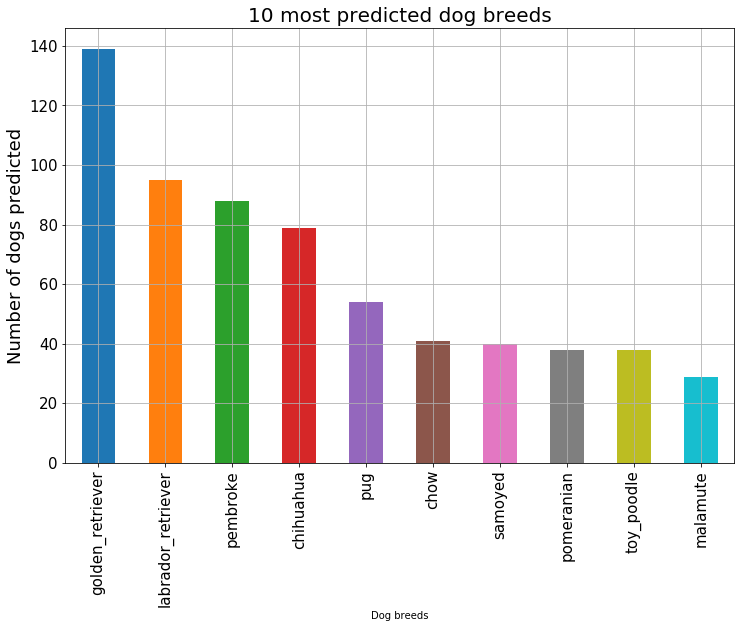

In [173]:
df_master.predicted_breed.value_counts().head(10).plot(kind='bar', figsize=(12,8), grid=True, fontsize = 15)
plt.title('10 most predicted dog breeds', fontsize=20)
plt.ylabel('Number of dogs predicted', fontsize=18)
plt.xlabel('Dog breeds', fontsize=10)
plt.savefig('dogbreeds.pdf')

> ## 10 Most common dog names

- The most popular dog name is Charlie (no wonder why nobody is named Charlie nowadays). Interestingly, Penny takes up the rth position. My poppa is called Penny. 

In [18]:
#number of unique names
names = df_master['name'].unique()
len(names)

931

In [32]:
# top ten names
df_master['name'].value_counts(ascending = False).head(10)

Lucy       11
Charlie    11
Cooper     10
Oliver     10
Tucker      9
Penny       9
Sadie       8
Winston     8
Lola        8
Toby        7
Name: name, dtype: int64

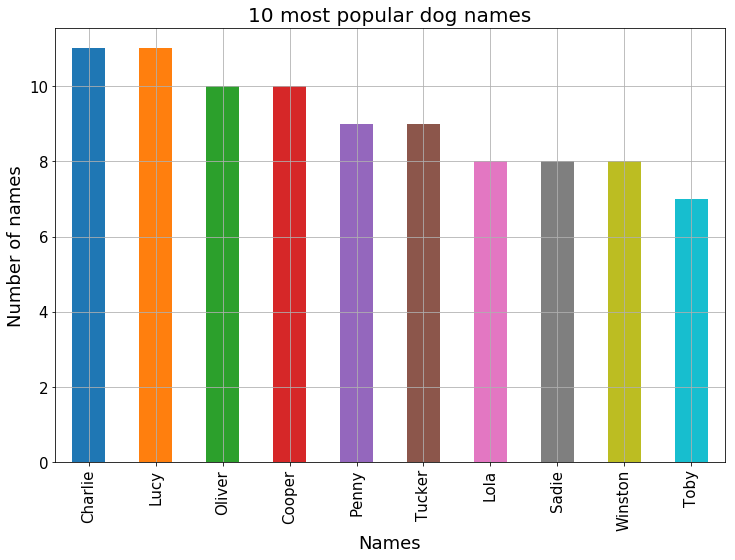

In [163]:
df_master.name.value_counts().head(10).plot(kind='bar', figsize=(12,8), grid=True, fontsize = 15)
plt.title('10 most popular dog names', fontsize=20)
plt.ylabel('Number of names', fontsize=18)
plt.xlabel('Names', fontsize=18)
plt.savefig('dognames.pdf')

> ## 10 most 'fake' predicted dog breeds with the highest average rating; 

In [ ]:
> - The algorithm predicted also weird stuff, nothing like dog breeds; this are the fake dog breed with the highest scores. Interestingly enough, dogs with high ratings weren´t predicted correctly. (Bow tie sounds like a funny name for a pet, though)

In [146]:
# mean rating according to breeds
breed_average = df_master.groupby('predicted_breed')[['normalized_ratings']].mean()\
    .reset_index().sort_values(['normalized_ratings'], ascending=False).head(5)

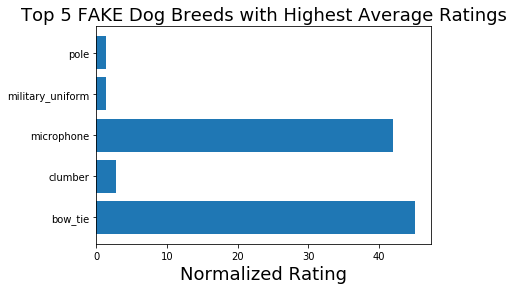

In [171]:
plt.barh(list(breed_average['predicted_breed']),list(breed_average['normalized_ratings']), color="tab:blue")
plt.xlabel('Normalized Rating', fontsize=18)
plt.title('Top 5 FAKE Dog Breeds with Highest Average Ratings', fontsize=18 )
plt.savefig('fake.pdf')